# Лабораторная 6. Сегментация методами водораздела

Выполнить сегментацию как на образце, применяя методы водораздела. Исходное изображение слева вверху. Получить все четыре изображения. Подробное описание: Гонсалес р.10.5

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Функция вывода изображения

In [2]:
def showImage(images, size = 20, countInRow=2, countInCol=2, colorMap = 'gray'):
    countImages = len(images)
    #size *= countImages
    pic_box = plt.figure(figsize=(size, size))
    for i, image in enumerate(images):
        pic_box.add_subplot(countInRow, countInCol, i+1)
        plt.imshow(image)
        plt.set_cmap(colorMap)
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        plt.axis('off')
    plt.show()

### Исходное изображение

In [3]:
image_srs = cv2.imread('1.png')

### Преобразование в серый цвет

In [4]:
image_srs_gray = cv2.cvtColor(image_srs,cv2.COLOR_BGR2GRAY)

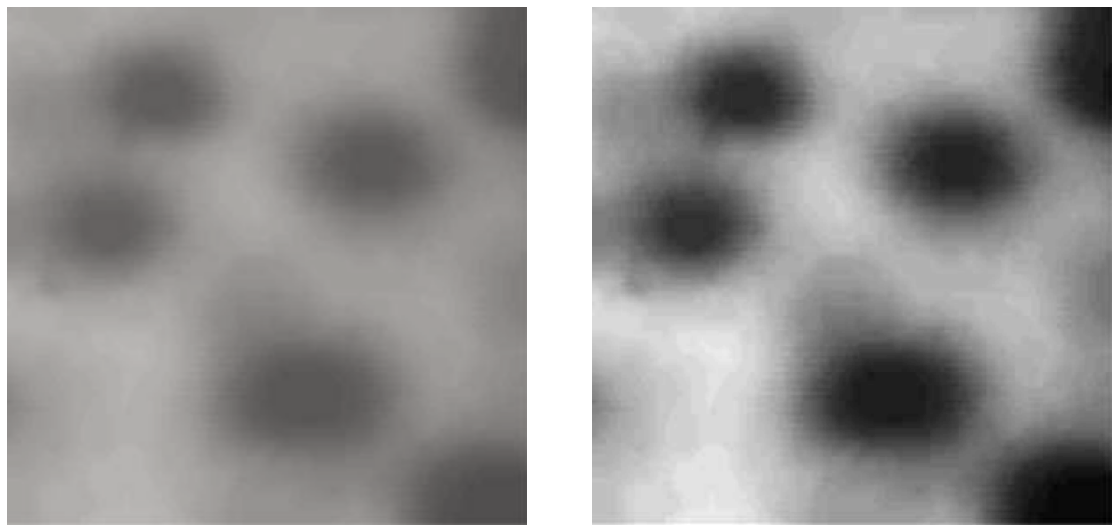

In [5]:
showImage([image_srs, image_srs_gray])

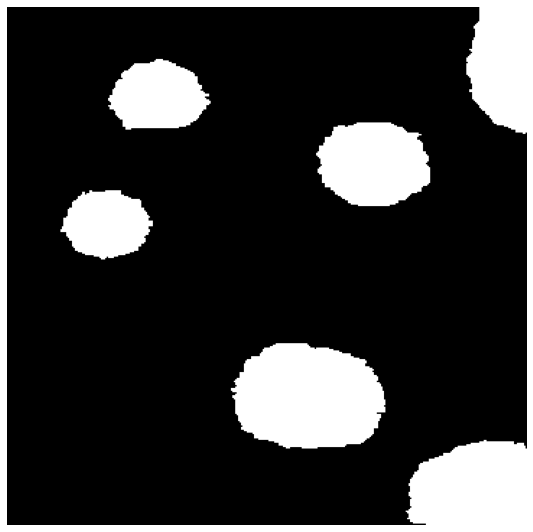

In [7]:
dark_zone = image_srs_gray.copy()
for i in range(dark_zone .shape[0]):
    for j in range(dark_zone .shape[1]):
        dark_zone[i, j] = 255 if dark_zone[i, j] <= 110 else 0
showImage([dark_zone])

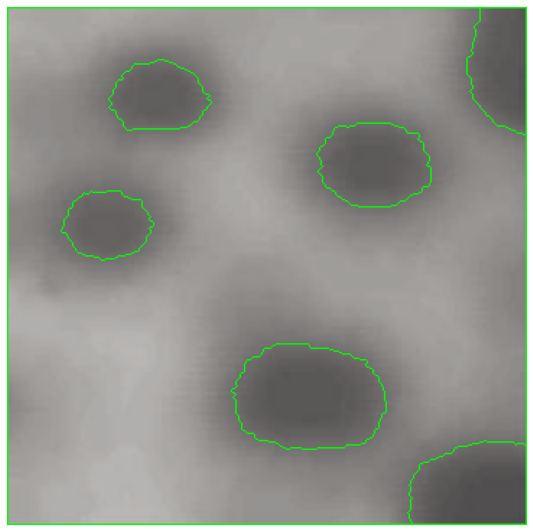

In [45]:
circles = cv2.morphologyEx(dark_zone, cv2.MORPH_GRADIENT, np.ones((2,2)), iterations = 1)
ret, diff_zones = cv2.connectedComponents(dark_zone)

diff_zones = diff_zones + 1
diff_zones[circles==255] = -1

image_with_markers = image_srs.copy()
markers = cv2.watershed(image_with_markers, diff_zones)
image_with_markers[diff_zones == -1] = [0, 255, 0]

showImage([image_with_markers])

In [30]:
def transformCircle(morphologyExIterator, dilateIterator, c):
    kernelCircle = cv2.circle(np.zeros((5, 5), np.uint8), (5 // 2,5 // 2), 3, 255, 1)
    opening = cv2.morphologyEx(dark_zone, cv2.MORPH_OPEN, kernelCircle, iterations = morphologyExIterator)

    sure_bg = cv2.dilate(opening, np.ones((3, 3)), iterations=dilateIterator)
    
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 0)
    
    ret, sure_fg = cv2.threshold(dist_transform, c*dist_transform.max(), 255, 0)
    
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    ret, markers = cv2.connectedComponents(sure_fg)
    
    markers = markers + 1
    
    markers[unknown==255] = 0
    
    image_with_markers = image_srs.copy()
    markers = cv2.watershed(image_with_markers, markers)
    image_with_markers[markers == -1] = [0, 255, 0]
    
    showImage([
               image_srs, 
               dark_zone,
               opening, 
               dist_transform, 
               sure_bg, 
        
               sure_fg, 
               unknown, 
               markers, 
               image_with_markers
              ], size=50, countInCol=5, countInRow=2)

interact(transformCircle, morphologyExIterator=(1, 20), dilateIterator=(1, 20), c=(0.1, 1, 0.05) )

interactive(children=(IntSlider(value=10, description='morphologyExIterator', max=20, min=1), IntSlider(value=…

<function __main__.transformCircle(morphologyExIterator, dilateIterator, c)>